In [2]:
import os
import rioxarray

In [3]:
'''
Folder
'''
os.chdir(r'C:/Users/jtrum/world_bank/data/')

In [4]:
'''
Read raster
'''

import xarray as xr

In [5]:
raster = xr.open_rasterio('ago_women_2020.tif')

C:\Users\jtrum\AppData\Local\Temp\ipykernel_18792\3927092705.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  raster = xr.open_rasterio('ago_women_2020.tif')


In [6]:
raster

<xarray.DataArray (band: 1, y: 54000, x: 50400)>
[2721600000 values with dtype=float64]
Coordinates:
  * band     (band) int32 1
  * y        (y) float64 -4.0 -4.0 -4.001 -4.001 ... -19.0 -19.0 -19.0 -19.0
  * x        (x) float64 11.0 11.0 11.0 11.0 11.0 ... 25.0 25.0 25.0 25.0 25.0
Attributes:
    transform:      (0.0002777777777780012, 0.0, 10.999861111264721, 0.0, -0....
    crs:            +proj=longlat +datum=WGS84 +no_defs=True
    res:            (0.0002777777777780012, 0.0002777777777780012)
    is_tiled:       0
    nodatavals:     (nan,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

In [7]:
import geopandas as gpd
aoi = gpd.read_file('aoiLuanda.geojson')

c:\Users\jtrum\miniconda3\envs\wash\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\jtrum\AppData\Local\Temp\ipykernel_18792\1169633712.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. Howeve

In [8]:
aoi

,NAME_1,GID_0,COUNTRY,GID_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC,"MULTIPOLYGON (((13.01919 -9.02194, 13.02049 -9..."


In [13]:
##clip raster
clip_bound = aoi.geometry

In [14]:
clip_bound

0    MULTIPOLYGON (((13.01919 -9.02194, 13.02049 -9...
Name: geometry, dtype: geometry

In [16]:
clip_raster = raster.rio.clip(clip_bound, from_disk=True)

In [ ]:
import matplotlib.pyplot as plt

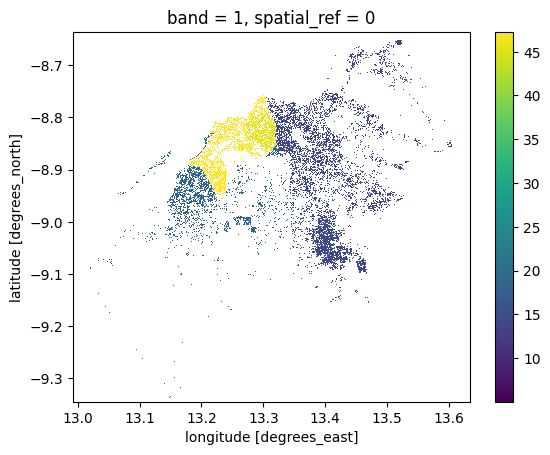

In [17]:
#plot clipped raster
clip_raster.plot()